In [1]:
%matplotlib inline
# Dependencies and Setup
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
# Files to Load
marathon_men_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 7\\Resources\\major_marathon_men (1).csv"
marathon_women_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 7\\Resources\\major_marathon_women (2).csv"


# Read the men and women Data
marathon_men_data_df = pd.read_csv(marathon_men_data)
marathon_women_data_df = pd.read_csv(marathon_women_data)


In [3]:
# Merge the two datasets 
joined_data_df = pd.concat([marathon_men_data_df, marathon_women_data_df])
joined_data_df.head(5)

,Year,Athlete,Country,Time,Marathon
0,2018.0,Yuki Kawauchi,Japan,2:15:58,Boston
1,2018.0,Mo Farah,United Kingdom,2:05:11,Chicago
2,2018.0,Eliud Kipchoge,Kenya,2:01:39,Berlin
3,2018.0,Eliud Kipchoge,Kenya,2:04:17,London
4,2018.0,Dickson Chumba,Kenya,2:05:30,Tokyo


In [4]:
# Using GroupBy in order to separate the data into fields according to "Country" values
grouped_country_df = joined_data_df.groupby(['Country'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_country_df)

# In order to be visualized, a data function must be used...
# grouped_country_df.count()

In [5]:
#Winner Count per country
Winner_Count_per_country = grouped_country_df[["Athlete"]].count()
Winner_Count_per_country.sort_values(by=["Athlete"], ascending=False).head(5)



,Athlete
Country,
Kenya,139
United States,70
Ethiopia,51
United Kingdom,36
Japan,19


In [6]:
# File to Load
country_gdp_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 7\\Resources\\Country GDP.csv"

# Use Pandas to read data
country_gdp_pd = pd.read_csv(country_gdp_data)
country_gdp_pd = country_gdp_pd.fillna('0')
country_gdp_pd.head()

,Year,Ethiopia,United Kingdom,Japan,Kenya,United States
0,1960,0,"72,328,047,042.16","44,307,342,950.40","791,265,458.82","543,300,000,000.00"
1,1961,0,"76,694,360,635.92","53,508,617,739.38","792,959,472.14","563,300,000,000.00"
2,1962,0,"80,601,939,635.25","60,723,018,683.73","868,111,400.01","605,100,000,000.00"
3,1963,0,"85,443,766,670.43","69,498,131,797.33","926,589,348.57","638,600,000,000.00"
4,1964,0,"93,387,598,813.93","81,749,006,381.51","998,759,333.64","685,800,000,000.00"


In [7]:
country_gdp_pd['Kenya'] = [float(blah.replace(",","")) for blah in country_gdp_pd['Kenya']]

In [8]:
country_gdp_pd['United Kingdom'] = [float(blah.replace(",","")) for blah in country_gdp_pd['United Kingdom']]


In [9]:
country_gdp_pd['Japan'] = [float(blah.replace(",","")) for blah in country_gdp_pd['Japan']]


In [10]:
country_gdp_pd['United States'] = [float(blah.replace(",","")) for blah in country_gdp_pd['United States']]


In [11]:
country_gdp_pd['Ethiopia'] = [float(blah.replace(",","")) for blah in country_gdp_pd['Ethiopia']]

#FILTERING BY COUNTRIES

In [12]:
#Ethiopian Data - Winner count per year
Ethiopia_data = joined_data_df[joined_data_df['Country']=='Ethiopia']
Ethiopia_data = Ethiopia_data["Year"].value_counts()
Ethiopia_data.head()


2010.0    6
2016.0    5
2015.0    4
2014.0    4
2012.0    4
Name: Year, dtype: int64

In [13]:
#UK Data
United_Kingdom_data = joined_data_df[joined_data_df['Country']=='United Kingdom']
United_Kingdom_data = United_Kingdom_data["Year"].value_counts()
United_Kingdom_data.head()

1985.0    4
1996.0    3
1982.0    3
1984.0    3
1983.0    2
Name: Year, dtype: int64

In [14]:
#Japan Data
Japan_data = joined_data_df[joined_data_df['Country']=='Japan']
Japan_data = Japan_data["Year"].value_counts()
Japan_data.head()

1987.0    2
1986.0    2
2000.0    1
1965.0    1
2010.0    1
Name: Year, dtype: int64

In [15]:
#Kenyan Data
Kenya_data = joined_data_df[joined_data_df['Country']=='Kenya']
Kenya_data = Kenya_data["Year"].value_counts()
Kenya_data.head()

2013.0    9
2017.0    9
2015.0    8
2011.0    8
2014.0    8
Name: Year, dtype: int64

In [16]:
#USA Data
United_States_data = joined_data_df[joined_data_df['Country']=='United States']
United_States_data = United_States_data["Year"].value_counts()
United_States_data.head()

1978.0    5
1979.0    5
1977.0    5
1982.0    4
1973.0    4
Name: Year, dtype: int64

In [17]:
Ethiopia_gdp = country_gdp_pd[['Year','Ethiopia']]
# Ethiopia_data

In [18]:
# Merge the two datasets 
# combined_Ethiopia_data_df = pd.merge(Ethiopia_gdp, Ethiopia_data, on='Year', how="left")
# combined_Ethiopia_data_df

In [19]:
Ethiopia1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='Ethiopia'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
Ethiopia2 = country_gdp_pd[['Year','Ethiopia']]
Ethiopia = pd.merge(Ethiopia2, Ethiopia1, on='Year', how='left')
Ethiopia = Ethiopia.fillna(0)
#plt.scatter(Ethiopia['Ethiopia'],Ethiopia['Athlete'])

In [20]:
Japan1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='Japan'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
Japan2 = country_gdp_pd[['Year','Japan']]
Japan = pd.merge(Japan2, Japan1, on='Year', how='left')
Japan = Japan.fillna(0)
Japan.head()
#plt.scatter(Japan['Japan'],Japan['Athlete'])

,Year,Japan,Athlete
0,1960,4.430734e+10,0.0
1,1961,5.350862e+10,0.0
2,1962,6.072302e+10,0.0
3,1963,6.949813e+10,0.0
4,1964,8.174901e+10,0.0


In [21]:
UK1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='United Kingdom'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
UK2 = country_gdp_pd[['Year','United Kingdom']]
UK = pd.merge(UK2, UK1, on='Year', how='left')
UK = UK.fillna(0)
UK.head()

,Year,United Kingdom,Athlete
0,1960,7.232805e+10,0.0
1,1961,7.669436e+10,0.0
2,1962,8.060194e+10,0.0
3,1963,8.544377e+10,0.0
4,1964,9.338760e+10,0.0


In [22]:
USA1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='United States'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
USA2 = country_gdp_pd[['Year','United States']]
USA = pd.merge(USA2, USA1, on='Year', how='left')
USA = USA.fillna(0)
USA.head()
#plt.scatter(USA['United States'],USA['Athlete'])


,Year,United States,Athlete
0,1960,5.433000e+11,0.0
1,1961,5.633000e+11,0.0
2,1962,6.051000e+11,0.0
3,1963,6.386000e+11,0.0
4,1964,6.858000e+11,0.0


In [23]:
Kenya1 = joined_data_df[['Year','Country','Athlete']][joined_data_df['Country']=='Kenya'].groupby(['Country','Year']).count().reset_index()[['Year','Athlete']]
Kenya2 = country_gdp_pd[['Year','Kenya']]
Kenya = pd.merge(Kenya2, Kenya1, on='Year', how='left')
Kenya = Kenya.fillna(0)
Kenya.head()

,Year,Kenya,Athlete
0,1960,7.912655e+08,0.0
1,1961,7.929595e+08,0.0
2,1962,8.681114e+08,0.0
3,1963,9.265893e+08,0.0
4,1964,9.987593e+08,0.0


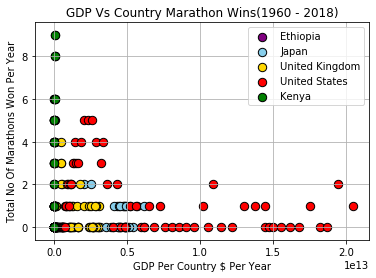

In [24]:
#define data
y1 = Ethiopia['Athlete']
x1 = Ethiopia['Ethiopia']
y2 = Japan['Athlete']
x2 = Japan['Japan']
y3 = UK['Athlete']
x3 = UK['United Kingdom']
y4 = USA['Athlete']
x4 = USA['United States']
y5 = Kenya['Athlete']
x5 = Kenya['Kenya']


plt.xlabel('GDP Per Country $ Per Year')
plt.ylabel('Total No Of Marathons Won Per Year')
plt.title('GDP Vs Country Marathon Wins(1960 - 2018)')



plt.scatter(x1, y1, marker='o', label='Ethiopia', s=70, c='purple' , alpha=1, edgecolors='black')
plt.scatter(x2, y2, marker='o', label='Japan', s=70, c='skyblue', alpha=1, edgecolors='black')
plt.scatter(x3, y3, marker='o', label='United Kingdom', s=70, c='gold', alpha=1, edgecolors='black')
plt.scatter(x4, y4, marker='o', label='United States', s=70, c='red', alpha=1, edgecolors='black')
plt.scatter(x5, y5, marker='o', label='Kenya', c='green', s=70, alpha=1, edgecolors='black')

# Plot legend.
plt.legend(loc="upper right", markerscale=1., scatterpoints=1, fontsize=10)
plt.grid(True)
plt.savefig("../Images/GDP_MarathonWins.png")
plt.show()